In [8]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import font_manager
import os

# Load the data
file_path = 'edit_type.csv'  # Update the file path if necessary
df = pd.read_csv(file_path)

# Remove rows where 'edit_type' column contains 'edit_type,multiplication' except the first line
df = df[df['edit_type'] != 'edit_type,multiplication']

# Convert 'multiplication' column to numeric, forcing errors to NaN (not a number)
df['multiplication'] = pd.to_numeric(df['multiplication'], errors='coerce')

# Drop rows with NaN in the 'multiplication' column (if any)
df = df.dropna(subset=['multiplication'])

# Set plot style (using academic colors and Times New Roman)
sns.set(style="whitegrid")

# Create separate plots for each edit_type
unique_edit_types = df['edit_type'].unique()

# Load the Times New Roman font
font = font_manager.FontProperties(family='Times New Roman', weight='bold')

# Create output directory if it doesn't exist
output_dir = "plots"
if not os.path.exists(output_dir):
    os.makedirs(output_dir)

# Loop through each unique edit_type and create a separate histogram
for edit_type in unique_edit_types:
    # Filter data for the current edit_type
    edit_data = df[df['edit_type'] == edit_type]

    # Calculate the average multiplication value for the current edit_type
    avg_multiplication = edit_data['multiplication'].mean()

    # Create a figure and axis for the current plot
    plt.figure(figsize=(10, 6))

    # Plot the distribution for the current edit_type
    plt.hist(edit_data['multiplication'], bins=10, alpha=0.6, edgecolor='black')

    # Plot the average line
    plt.axvline(avg_multiplication, color='red', linestyle='--', linewidth=2, label=f'Average: {avg_multiplication:.4f}')

    # Set titles and labels with Times New Roman font in bold
    plt.title(f'Distribution of Multiplication Values for {edit_type}', fontsize=16, family='Times New Roman', weight='bold')
    plt.xlabel('Multiplication Value', fontsize=12, family='Times New Roman', weight='bold')
    plt.ylabel('Frequency', fontsize=12, family='Times New Roman', weight='bold')

    # Rotate x-ticks for readability
    plt.xticks(rotation=45, family='Times New Roman', weight='bold')

    # Add legend with the Times New Roman font
    plt.legend(title='Average Line', prop=font, fontsize=10)

    # Save the plot to the output directory with the edit_type as the filename
    safe_edit_type = edit_type.replace(" ", "_").replace(":", "_")  # Replace spaces and special chars
    plot_filename = os.path.join(output_dir, f"{safe_edit_type}_distribution.png")
    plt.tight_layout()
    plt.savefig(plot_filename)  # Save the plot
    plt.close()  # Close the figure to avoid overlap with the next plot

print(f"Plots saved to the directory: {output_dir}")


Plots saved to the directory: plots


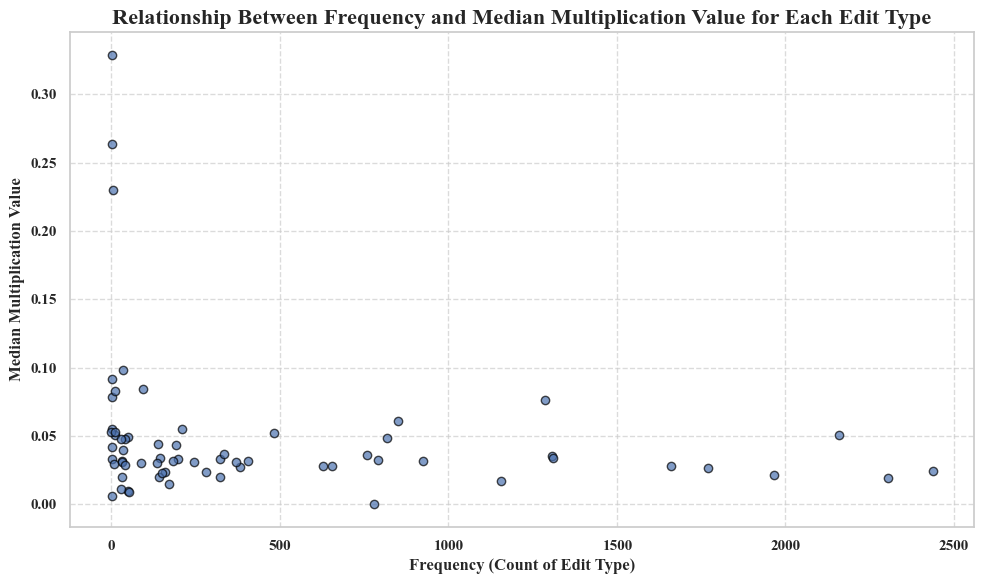

In [13]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import font_manager

# Load the data
file_path = 'edit_type.csv'  # Update the file path if necessary
df = pd.read_csv(file_path)

# Remove rows where 'edit_type' column contains 'edit_type,multiplication' except the first line
df = df[df['edit_type'] != 'edit_type,multiplication']

# Convert 'multiplication' column to numeric, forcing errors to NaN (not a number)
df['multiplication'] = pd.to_numeric(df['multiplication'], errors='coerce')

# Drop rows with NaN in the 'multiplication' column (if any)
df = df.dropna(subset=['multiplication'])

# Set plot style (using academic colors and Times New Roman)
sns.set(style="whitegrid")

# Group by 'edit_type' and calculate the frequency and average multiplication value for each type
# grouped = df.groupby('edit_type').agg(
#     frequency=('multiplication', 'size'),
#     average_multiplication=('multiplication', 'mean')
# ).reset_index()
# Calculate the median multiplication value for each edit_type

grouped = df.groupby('edit_type').agg(
    frequency=('multiplication', 'size'),          # Count occurrences of each edit_type
    median_multiplication=('multiplication', 'median')  # Calculate the median of multiplication values
).reset_index()

# Load the Times New Roman font
font = font_manager.FontProperties(family='Times New Roman', weight='bold')

# Create the plot
plt.figure(figsize=(10, 6))

# Scatter plot of frequency vs. average multiplication value
plt.scatter(grouped['frequency'], grouped['median_multiplication'], color='b', edgecolor='black', alpha=0.7)


# Set titles and labels with Times New Roman font in bold
plt.title('Relationship Between Frequency and Median Multiplication Value for Each Edit Type', 
          fontsize=16, family='Times New Roman', weight='bold')
plt.xlabel('Frequency (Count of Edit Type)', fontsize=12, family='Times New Roman', weight='bold')
plt.ylabel('Median Multiplication Value', fontsize=12, family='Times New Roman', weight='bold')

# Add grid lines for better readability
plt.grid(True, linestyle='--', alpha=0.7)

# Set font properties for the ticks
plt.xticks(family='Times New Roman', weight='bold')
plt.yticks(family='Times New Roman', weight='bold')

# Display the plot
plt.tight_layout()
plt.show()


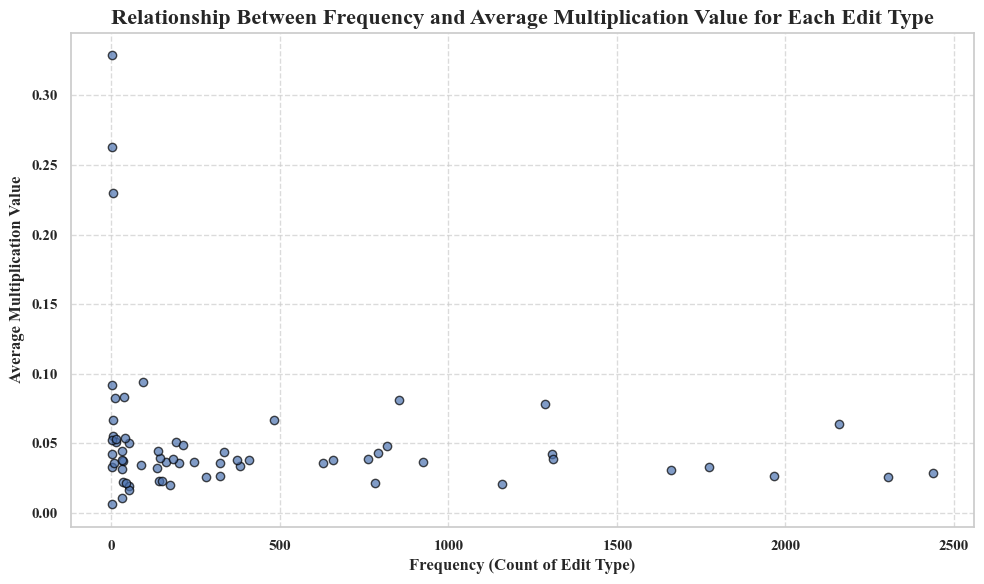

In [16]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import font_manager

# Load the data
file_path = 'edit_type.csv'  # Update the file path if necessary
df = pd.read_csv(file_path)

# Remove rows where 'edit_type' column contains 'edit_type,multiplication' except the first line
df = df[df['edit_type'] != 'edit_type,multiplication']

# Convert 'multiplication' column to numeric, forcing errors to NaN (not a number)
df['multiplication'] = pd.to_numeric(df['multiplication'], errors='coerce')

# Drop rows with NaN in the 'multiplication' column (if any)
df = df.dropna(subset=['multiplication'])

# Set plot style (using academic colors and Times New Roman)
sns.set(style="whitegrid")

#Group by 'edit_type' and calculate the frequency and average multiplication value for each type
grouped = df.groupby('edit_type').agg(
    frequency=('multiplication', 'size'),
    average_multiplication=('multiplication', 'mean')
).reset_index()

# Load the Times New Roman font
font = font_manager.FontProperties(family='Times New Roman', weight='bold')

# Create the plot
plt.figure(figsize=(10, 6))

# Scatter plot of frequency vs. average multiplication value
plt.scatter(grouped['frequency'], grouped['average_multiplication'], color='b', edgecolor='black', alpha=0.7)


# Set titles and labels with Times New Roman font in bold
plt.title('Relationship Between Frequency and Average Multiplication Value for Each Edit Type', 
          fontsize=16, family='Times New Roman', weight='bold')
plt.xlabel('Frequency (Count of Edit Type)', fontsize=12, family='Times New Roman', weight='bold')
plt.ylabel('Average Multiplication Value', fontsize=12, family='Times New Roman', weight='bold')

# Add grid lines for better readability
plt.grid(True, linestyle='--', alpha=0.7)

# Set font properties for the ticks
plt.xticks(family='Times New Roman', weight='bold')
plt.yticks(family='Times New Roman', weight='bold')

# Display the plot
plt.tight_layout()
plt.show()


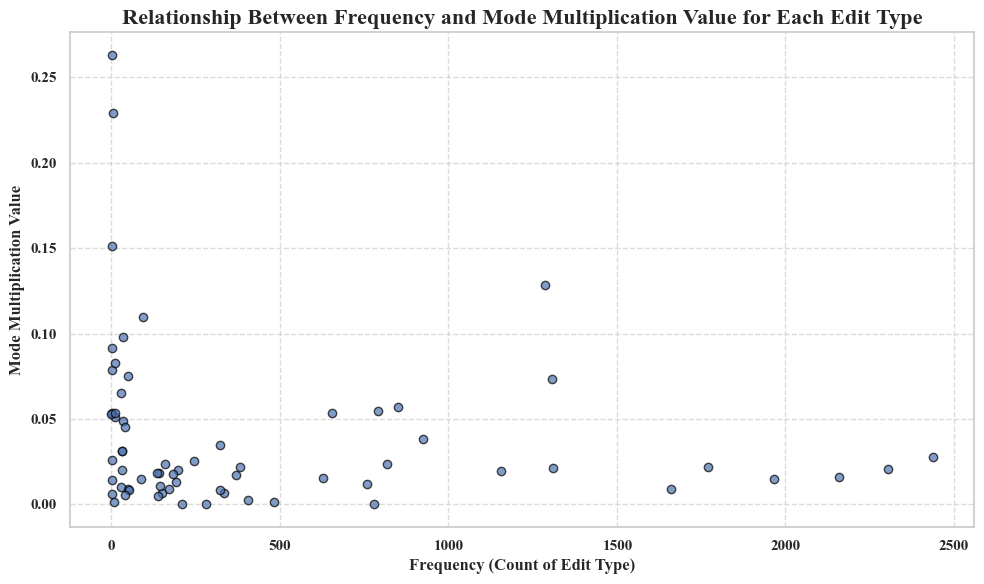

In [20]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import font_manager

# Load the data
file_path = 'edit_type.csv'  # Update the file path if necessary
df = pd.read_csv(file_path)

# Remove rows where 'edit_type' column contains 'edit_type,multiplication' except the first line
df = df[df['edit_type'] != 'edit_type,multiplication']

# Convert 'multiplication' column to numeric, forcing errors to NaN (not a number)
df['multiplication'] = pd.to_numeric(df['multiplication'], errors='coerce')

# Drop rows with NaN in the 'multiplication' column (if any)
df = df.dropna(subset=['multiplication'])

# Set plot style (using academic colors and Times New Roman)
sns.set(style="whitegrid")

# #Group by 'edit_type' and calculate the frequency and average multiplication value for each type
# grouped = df.groupby('edit_type').agg(
#     frequency=('multiplication', 'size'),
#     average_multiplication=('multiplication', 'mean')
# ).reset_index()

# Calculate the mode for each edit_type
grouped = df.groupby('edit_type').agg(
    frequency=('multiplication', 'size'),           # Count occurrences of each edit_type
    mode_multiplication=('multiplication', lambda x: x.mode().iloc[0])  # Get the first mode (if there's a tie, it takes the first)
).reset_index()

# Load the Times New Roman font
font = font_manager.FontProperties(family='Times New Roman', weight='bold')

# Create the plot
plt.figure(figsize=(10, 6))

# Scatter plot of frequency vs. average multiplication value
plt.scatter(grouped['frequency'], grouped['mode_multiplication'], color='b', edgecolor='black', alpha=0.7)


# Set titles and labels with Times New Roman font in bold
plt.title('Relationship Between Frequency and Mode Multiplication Value for Each Edit Type', 
          fontsize=16, family='Times New Roman', weight='bold')
plt.xlabel('Frequency (Count of Edit Type)', fontsize=12, family='Times New Roman', weight='bold')
plt.ylabel('Mode Multiplication Value', fontsize=12, family='Times New Roman', weight='bold')

# Add grid lines for better readability
plt.grid(True, linestyle='--', alpha=0.7)

# Set font properties for the ticks
plt.xticks(family='Times New Roman', weight='bold')
plt.yticks(family='Times New Roman', weight='bold')

# Display the plot
plt.tight_layout()
plt.show()


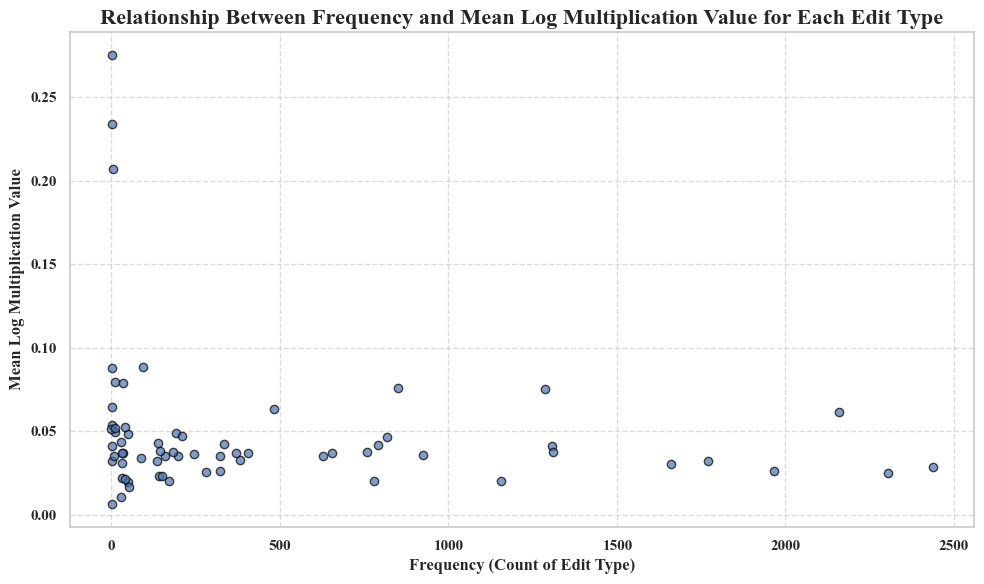

In [25]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from matplotlib import font_manager

# Load the data
file_path = 'edit_type.csv'  # Update the file path if necessary
df = pd.read_csv(file_path)

# Remove rows where 'edit_type' column contains 'edit_type,multiplication' except the first line
df = df[df['edit_type'] != 'edit_type,multiplication']

# Convert 'multiplication' column to numeric, forcing errors to NaN (not a number)
df['multiplication'] = pd.to_numeric(df['multiplication'], errors='coerce')

# Drop rows with NaN in the 'multiplication' column (if any)
df = df.dropna(subset=['multiplication'])

# Set plot style (using academic colors and Times New Roman)
sns.set(style="whitegrid")

# Apply log transformation to multiplication values
df['log_multiplication'] = df['multiplication'].apply(lambda x: np.log(x + 1))  # Adding 1 to avoid log(0)

# Group by 'edit_type' and calculate the mean of the log-transformed values
log_grouped = df.groupby('edit_type').agg(
    frequency=('multiplication', 'size'),           # Count occurrences of each edit_type
    log_mean_multiplication=('log_multiplication', 'mean')  # Calculate the mean of log-transformed multiplication values
).reset_index()

# Load the Times New Roman font
font = font_manager.FontProperties(family='Times New Roman', weight='bold')

# Create the plot
plt.figure(figsize=(10, 6))

# Scatter plot of frequency vs. mean log multiplication value
plt.scatter(log_grouped['frequency'], log_grouped['log_mean_multiplication'], color='b', edgecolor='black', alpha=0.7)

# Set titles and labels with Times New Roman font in bold
plt.title('Relationship Between Frequency and Mean Log Multiplication Value for Each Edit Type', 
          fontsize=16, family='Times New Roman', weight='bold')
plt.xlabel('Frequency (Count of Edit Type)', fontsize=12, family='Times New Roman', weight='bold')
plt.ylabel('Mean Log Multiplication Value', fontsize=12, family='Times New Roman', weight='bold')

# Add grid lines for better readability
plt.grid(True, linestyle='--', alpha=0.7)

# Set font properties for the ticks
plt.xticks(family='Times New Roman', weight='bold')
plt.yticks(family='Times New Roman', weight='bold')

# Display the plot
plt.tight_layout()
plt.show()


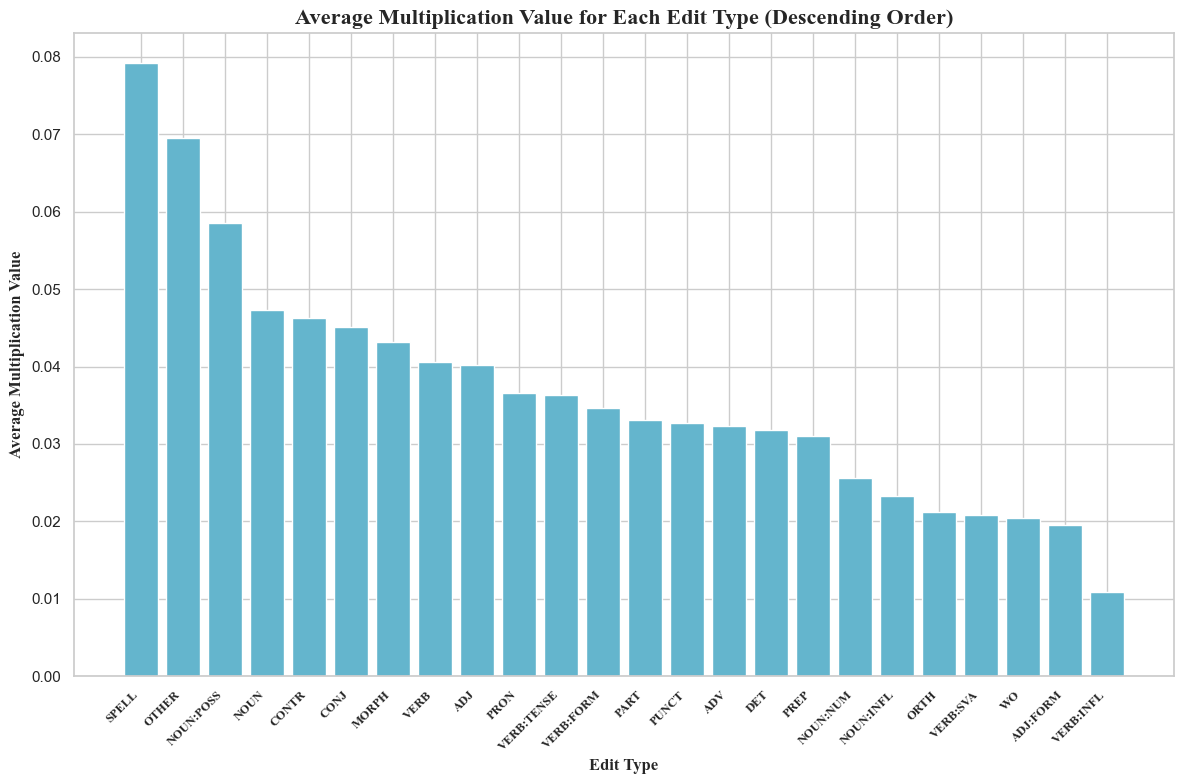

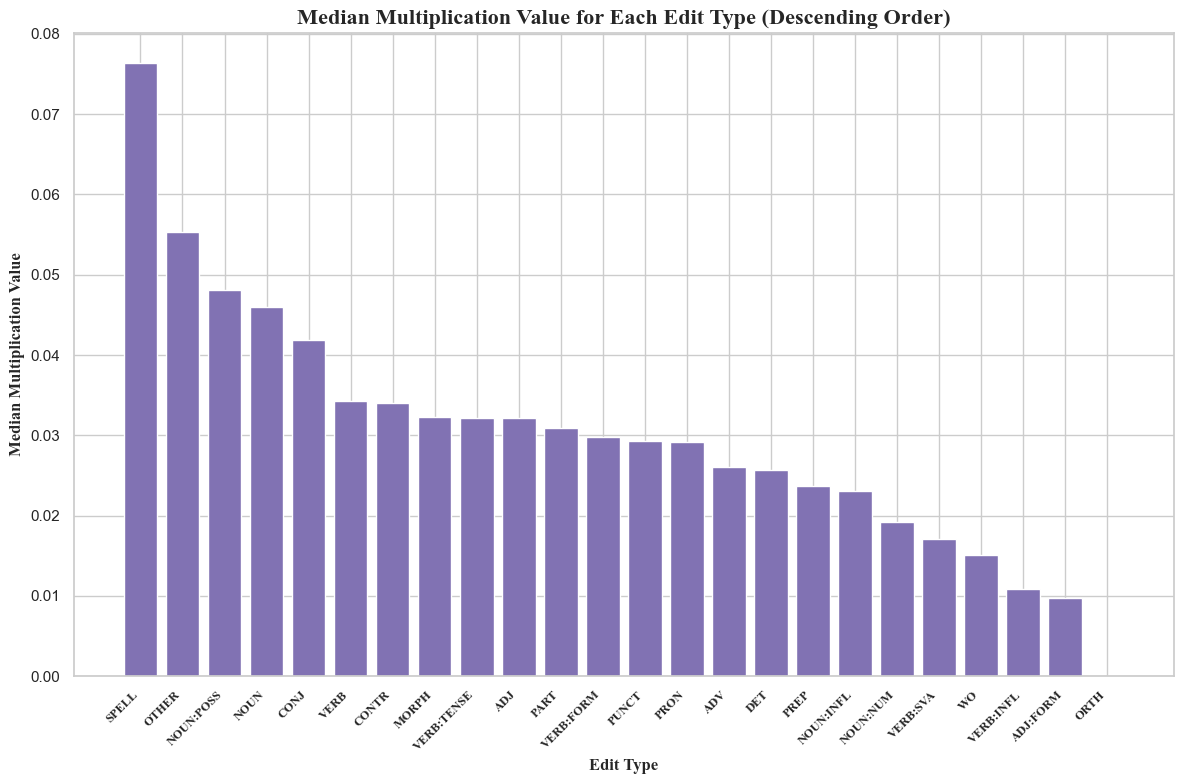

In [56]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Read the file (ensure the file path is correct)
df = pd.read_csv("edit_type.csv")

# Remove rows where 'edit_type' column contains 'edit_type,multiplication' except the first line
df = df[df['edit_type'] != 'edit_type,multiplication']

# Convert 'multiplication' column to numeric, forcing errors to NaN (not a number)
df['multiplication'] = pd.to_numeric(df['multiplication'], errors='coerce')

# Drop rows with NaN in the 'multiplication' column (if any)
df = df.dropna(subset=['multiplication'])

# Handle edit_type to make sure all lists like ['U:OTHER', 'U:OTHER'] are converted to ['U:OTHER']
df['edit_type'] = df['edit_type'].apply(lambda x: str(eval(x)).strip("[]").replace("'", "").replace(",", "").split(" ")[0].split(":", 1)[-1])

# This will convert ['U:OTHER', 'U:OTHER'] into 'U:OTHER'

# Group by 'edit_type' and calculate the frequency, average, and median multiplication values for each edit type
grouped = df.groupby('edit_type').agg(
    frequency=('multiplication', 'size'),  # Count occurrences of each edit_type
    average_multiplication=('multiplication', 'mean'),  # Calculate average of multiplication values
    median_multiplication=('multiplication', 'median')  # Calculate median of multiplication values
).reset_index()

# Sort the values by average multiplication in descending order
sorted_by_average = grouped.sort_values(by='average_multiplication', ascending=False)

# Sort the values by median multiplication in descending order
sorted_by_median = grouped.sort_values(by='median_multiplication', ascending=False)

# # Display sorted data (if you want to print the sorted results)
# print("Sorted by Average Multiplication:")
# print(sorted_by_average[['edit_type', 'average_multiplication']])

# print("\nSorted by Median Multiplication:")
# print(sorted_by_median[['edit_type', 'median_multiplication']])

# Plot for average multiplication (sorted)
plt.figure(figsize=(12, 8))  # Increase figure size for better readability
plt.bar(sorted_by_average['edit_type'], sorted_by_average['average_multiplication'], color='c')
plt.xlabel('Edit Type', fontsize=12, family='Times New Roman', weight='bold')
plt.ylabel('Average Multiplication Value', fontsize=12, family='Times New Roman', weight='bold')
plt.title('Average Multiplication Value for Each Edit Type (Descending Order)', fontsize=16, family='Times New Roman', weight='bold')

# Rotate x-ticks and adjust the space (45-degree tilt)
plt.xticks(rotation=45, ha='right', family='Times New Roman', weight='bold', fontsize=9)
plt.tight_layout()  # Make sure labels fit
plt.show()

# Plot for median multiplication (sorted)
plt.figure(figsize=(12, 8))  # Increase figure size for better readability
plt.bar(sorted_by_median['edit_type'], sorted_by_median['median_multiplication'], color='m')
plt.xlabel('Edit Type', fontsize=12, family='Times New Roman', weight='bold')
plt.ylabel('Median Multiplication Value', fontsize=12, family='Times New Roman', weight='bold')
plt.title('Median Multiplication Value for Each Edit Type (Descending Order)', fontsize=16, family='Times New Roman', weight='bold')

# Rotate x-ticks and adjust the space (45-degree tilt)
plt.xticks(rotation=45, ha='right', family='Times New Roman', weight='bold', fontsize=9)
plt.tight_layout()  # Make sure labels fit
plt.show()


In [60]:
#!/usr/bin/env python3
import sys

def process_m2_file(input_file, output_file):
    """
    处理 .m2 文件：读取文件内容，删除所有以 "A" 开头且以 "|||1" 结尾的行，
    将处理后的内容写入到输出文件中。
    """
    try:
        # 使用 with 语句打开输入文件和输出文件，确保文件正确关闭
        with open(input_file, 'r', encoding='utf-8') as infile, \
             open(output_file, 'w', encoding='utf-8') as outfile:
            # 遍历每一行
            for line in infile:
                # 去除右侧空白字符（包括换行符）
                stripped_line = line.rstrip()
                # 如果行以 "A" 开头并且以 "|||1" 结尾，则跳过该行
                if stripped_line.startswith("A") and stripped_line.endswith("|||0"):
                    continue
                # 否则将该行写入输出文件
                outfile.write(line)
        print(f"处理完成，已将结果写入 {output_file}")
    except Exception as e:
        print(f"处理文件时出错：{e}")

if __name__ == "__main__":
    input_file = "CLEME/extracted_target_new.m2"
    output_file = "CLEME/golden_correction_0_annotator.m2"
    process_m2_file(input_file, output_file)


处理完成，已将结果写入 CLEME/golden_correction_0_annotator.m2
